# Fall Problem Session 5
## Forecasting The Bachelorette and Pumpkin Spice I

In the first of two time series based problem sessions you will focus on some of the basics of time series forecasting. In particular, you will do some exploratory data analysis, test your understanding of data split adjustments and build baseline models for two time series.

The problems in this notebook will cover the content covered in our `Time Series Forecasting` lectures including:
- `What are Time Series and Forecasting`,
- `Adjustments for Time Series Data`,
- `Time and Dates in Python` and
- `Baseline Forecasts`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

sns.set_style("whitegrid")

#### 1. <a href="https://www.imdb.com/title/tt0348894/">The Bachelorette</a>

The first data set you will work with is the IMDB ratings of every episode of the Bachelorette (as of August 25, 2022). This data was pulled with the `Cinemagoer` python IMDB API wrapper (this was touched on in `Fall Problem Session 1`). 

##### a.

Load `the_bachelorette.csv` from the `Data` folder, look at the first five observations.

In [3]:
bachelorette = pd.read_csv('../Data/the_bachelorette.csv')

In [4]:
bachelorette.head(5)

,episode_number,title,season,season_episode_number,imdb_rating
0,1,Episode #1.1,1,1,5.901235
1,2,Episode #1.2,1,2,5.801235
2,3,Episode #1.3,1,3,4.901235
3,4,Episode #1.4,1,4,5.401235
4,5,Episode #1.5,1,5,5.401235


Here are descriptions for the columns of this data set:
- `episode_number` is the number of the episode with respect to the entire series run,
- `title` is the title of the episode,
- `season` is the number of the season in which the episode aired,
- `season_episode_number` is the number of the episode with respect to the season in which it aired,
- `imdb_rating` is the average rating of the episode among IMDB's users.

##### b. 

Our goal will be to predict how good the next episode of the Bachelorette is, that means we want a forecast horizon of $1$ episode. Make a train test split that sets aside the last three episodes as a test set.

In [8]:
bach_train = bachelorette.iloc[:-3]
bach_test = bachelorette.iloc[-3:]

bach_test.tail(5)

,episode_number,title,season,season_episode_number,imdb_rating
216,217,Episode #19.10,19,10,7.201235
217,218,Episode #19.11,19,11,6.901235
218,219,Episode #19.12,19,12,5.901235


##### c. 

Plot the IMDB rating for each episode using the training data.

Does this time series seem to exhibit a trend? Does this time series seem to exhibit seasonality? If it exhibits either do your best to describe what you see.

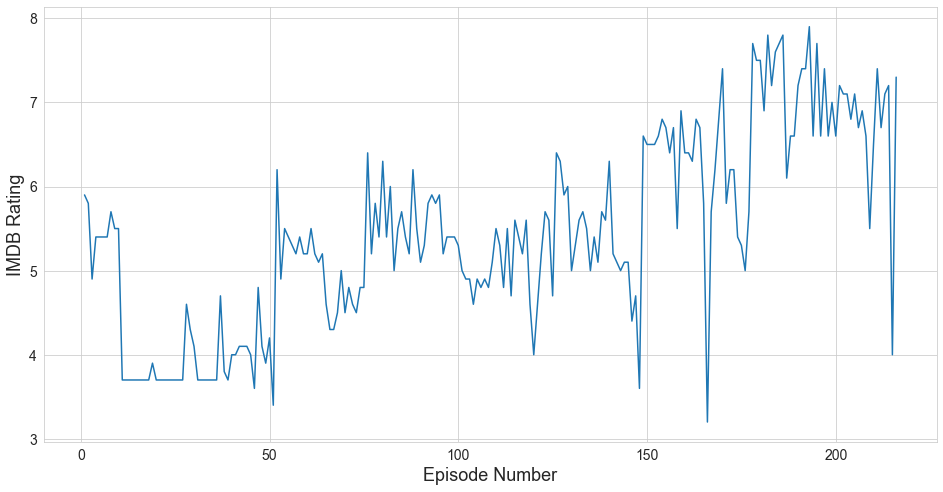

In [9]:
plt.figure(figsize=(16,8))

## place your plot here
plt.plot(bach_train.episode_number.values,bach_train.imdb_rating.values)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Episode Number", fontsize=18)
plt.ylabel("IMDB Rating", fontsize=18)

    
plt.show()

##### Write any notes you would like here



##### d.

Choose a baseline model that you could build on these data. Plot the forecast from this baseline along with the training data, do not plot the test data.

Recall that we learned about the following baseline models for non-seasonal data:
- The average forecast
- The naive forecast
- The trend forecast and
- The random walk with drift.

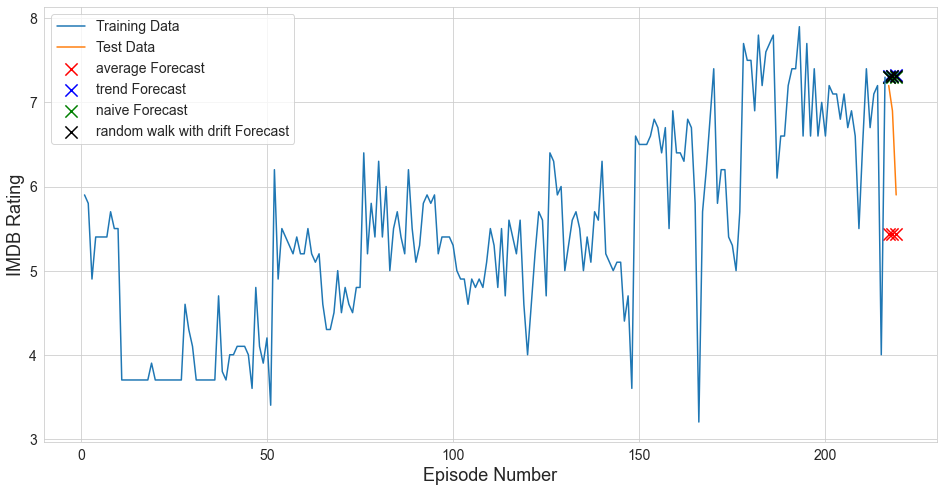

In [41]:
plt.figure(figsize=(16,8))

## plot the training data here
plt.plot(bach_train.episode_number.values,bach_train.imdb_rating.values,
            label = "Training Data")


## plot the training data here
plt.plot(bach_test.episode_number.values,bach_test.imdb_rating.values,
            label = "Test Data")

## plot your forecast here
plt.scatter(bach_test.episode_number.values,np.ones(len(bach_test))*bach_train.imdb_rating.values.mean(),
            marker='x',
            s=150,
            color='red',
            label="average Forecast")

## plot your forecast here
plt.scatter(bach_test.episode_number.values,bach_test.episode_number.values*bach_train.imdb_rating.diff()[1:].mean()+bach_train.imdb_rating.values[0],
            marker='x',
            s=150,
            color='blue',
            label="trend Forecast")

# ## plot your forecast here
# plt.scatter(bach_train.episode_number.values,bach_train.episode_number.values*bach_train.imdb_rating.diff()[1:].mean()+bach_train.imdb_rating.values[-1],
#             marker='x',
#             s=150,
#             color='blue',
#             label="trend Forecast")

# ## plot your forecast here
plt.scatter(bach_test.episode_number.values,np.ones(len(bach_test))*bach_train.imdb_rating.values[-1],
            marker='x',
            s=150,
            color='green',
            label="naive Forecast")

# ## plot your forecast here
plt.scatter(bach_test.episode_number.values,(bach_test.episode_number.values-len(bach_train))*bach_train.imdb_rating.diff().mean()+bach_train.imdb_rating.values[-1],
            marker='x',
            s=150,
            color='black',
            label="random walk with drift Forecast")

plt.legend(fontsize=14)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Episode Number", fontsize=18)
plt.ylabel("IMDB Rating", fontsize=18)

    
plt.show()

##### e.

Calculate the average cross-validation root mean squared error for your baseline model. 

Set up this cross-validation so that there are ten splits and each holdout set only has three observations in it.

In [24]:
## import things from sklearn here
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


In [25]:
kfold = TimeSeriesSplit(n_splits = 10,
                           test_size = 3)

In [26]:
# make a holder for the rmses
rmses = np.zeros((10,4))

i = 0
## loop through your splits here
for train_index,test_index in kfold.split(bach_train):
    bach_tt = bach_train.loc[train_index]
    bach_ho = bach_train.loc[test_index]
    
    ## make your forecast
    #average
    avg_fore = np.ones(len(bach_ho))*bach_tt.imdb_rating.values.mean()
    
    #trend
    tre_fore = bach_ho.episode_number.values*bach_tt.imdb_rating.diff().mean()
    
    #naive
    nai_fore = np.ones(len(bach_ho))*bach_tt.imdb_rating.values[-1]
    
    #random walk
    ran_fore = (bach_ho.episode_number.values-len(bach_tt))*bach_tt.imdb_rating.diff().mean()+bach_tt.imdb_rating.values[-1]
    
    ## record the rmse here
    rmses[i,0] = np.sqrt(mean_squared_error(bach_ho.imdb_rating,avg_fore))
    rmses[i,1] = np.sqrt(mean_squared_error(bach_ho.imdb_rating,tre_fore))
    rmses[i,2] = np.sqrt(mean_squared_error(bach_ho.imdb_rating,nai_fore))
    rmses[i,3] = np.sqrt(mean_squared_error(bach_ho.imdb_rating,ran_fore))
    
    
    i = i + 1

In [27]:
## find the average rmses
rmses.mean(0)

array([1.63735825, 5.68547221, 0.77530361, 0.77960017])

In [33]:
ran_fore

array([7.10689495, 7.11255532, 7.1182157 ])

In [34]:
tre_fore

array([1.21132075, 1.21698113, 1.22264151])

We will return to these baseline performances in `Fall Problem Session 6`.

#### 2. Pumpkin spice interest

The second data set you will work with in this problem session is a time series collected using <a href="https://trends.google.com/trends/?geo=US">Google Trends</a>. This data set contains the Google Trends interest level in the United States for the search term "pumkin spice" since 2004.

##### a.

Load the data stored in `pumpkin_spice.csv` in the `Data` folder then look at the first five rows.

You may want to turn the `Month` column into a `datetime` using the `parse_dates` argument of `read_csv`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html</a>.

In [39]:
pump = pd.read_csv('../Data/pumpkin_spice.csv',parse_dates=['Month'])

In [40]:
pump.head(5)

,Month,interest_level
0,2004-01-01,2
1,2004-02-01,1
2,2004-03-01,0
3,2004-04-01,0
4,2004-05-01,1


- The `Month` column of this data set gives the month and year that the interest was measured. 
- The `interest_level` column of this data set gives the level of interest for "pumpkin spice" in the United States. From Google Trends: "Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term."

##### b.

One thing you may need to get more practice with is identifying the <i>stakeholders</i> for a particular problem. The stakeholders are the people who are most interested in your problem and the outcome of your solution.

Thinking about this can help you frame your project goals and focus your thinking to provide a solution that most suits the stakeholders' wants/needs.

For this question, take some time to think about what kinds of people may most be interested in forecasting Google search interest in "pumpkin spice". Why might they be interested? How could this forecast best help them?

##### Write here




##### c.

Make a train test split in the data. Set aside all observations after December 31, 2021 aside as the test set.

<i>Hint: the `datetime` module could be useful.</i>

In [50]:
pump_train = pump[pump['Month'] <= datetime(2021,12,31)]
pump_test = pump[pump['Month'] > datetime(2021,12,31)]

In [51]:
print(len(pump),len(pump_train),len(pump_test))

225 216 9


##### d.

Plot the training data.

Does this time series appear to exhibit a trend or seasonality?

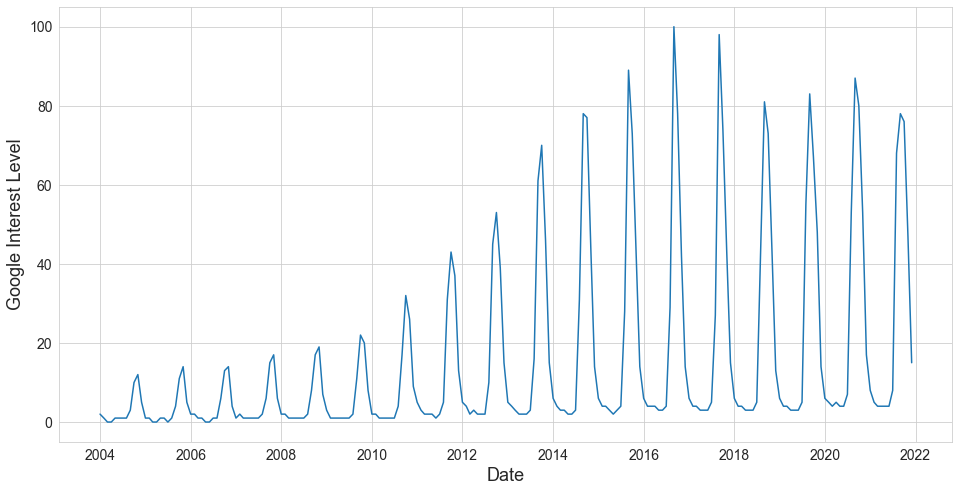

In [52]:
plt.figure(figsize=(16,8))
plt.plot(pump_train.Month,pump_train.interest_level)



plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Google Interest Level", fontsize=18)

plt.show()

##### Write any notes you would like here

##### e.

One way to explore the number of time steps in a given season is to plot scatter plots of the time series against itself at given <i>lags</i>. Such plots place the time series on the horizontal axis and the time series at $\ell$ steps into the future on the vertical axis. Seasonal data should exhibit a high correlation between itself and lags at multiples of the season length.

Make such scatter plots for lag values from $\ell=1$ to $\ell=25$. Also calculate the correlation between the time series and its lagged series for each value of $\ell$ (this is known as the <i>autocorrelation</i>). Using this information how long would you say a season is?

In [55]:
## You can use this function to get the lag if you'd like
def make_lag_plot(lag):
    ## get all observations up to the last "lag" values
    x = pump_train.interest_level.values[:-lag]
    
    ## get the lagged values
    y = pump_train.interest_level.values[lag:]
    
    ## Plot the normal series against the lagged series
    plt.figure(figsize=(6,6))
    
    plt.scatter(x, y, alpha=.7)
    plt.plot([0,100], [0,100], 'k--')
    
    plt.title("Lag = " + str(lag), fontsize=16)
    
    plt.show()
    
    ## return the correlation between the time series
    ## and the lagged series
    return np.corrcoef(x,y)[0,1]

<Figure size 432x288 with 0 Axes>

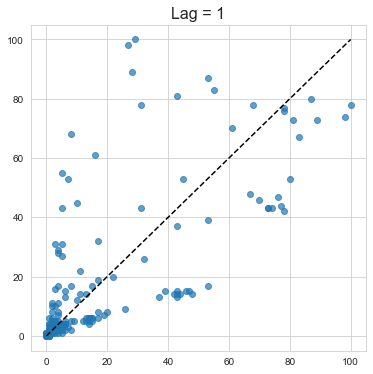

0.7526234944645146


<Figure size 432x288 with 0 Axes>

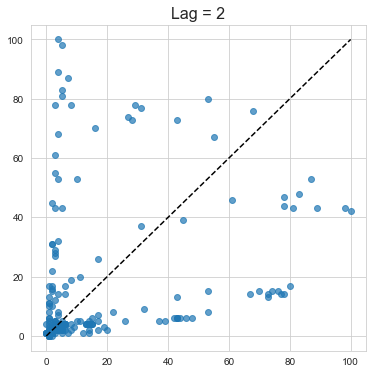

0.313263742638349


<Figure size 432x288 with 0 Axes>

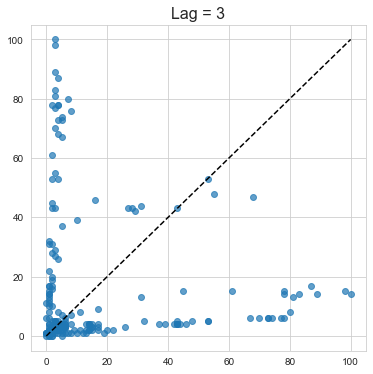

-0.03902052676246734


<Figure size 432x288 with 0 Axes>

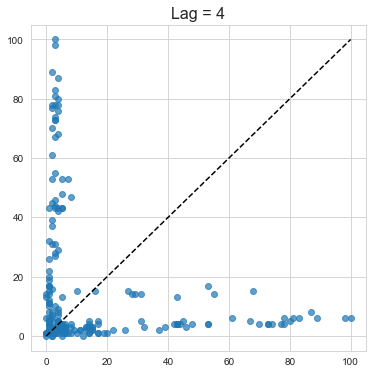

-0.20858982553627317


<Figure size 432x288 with 0 Axes>

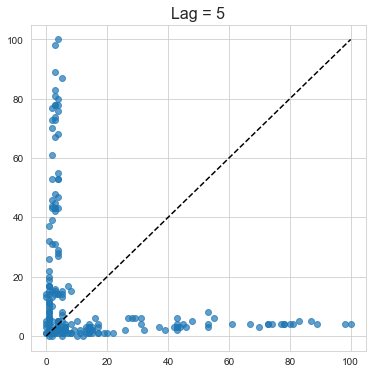

-0.2520439235845846


<Figure size 432x288 with 0 Axes>

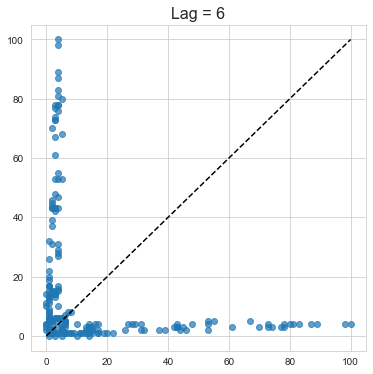

-0.2593743181006171


<Figure size 432x288 with 0 Axes>

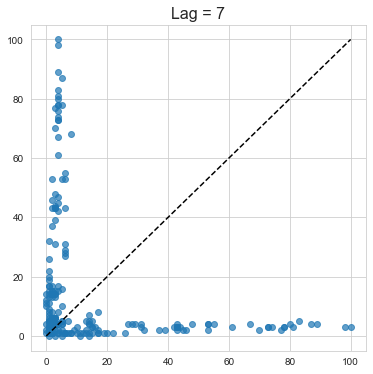

-0.2528737867199633


<Figure size 432x288 with 0 Axes>

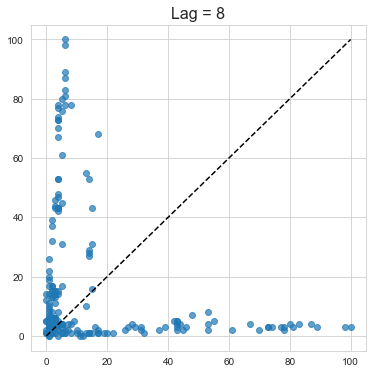

-0.20789039745926055


<Figure size 432x288 with 0 Axes>

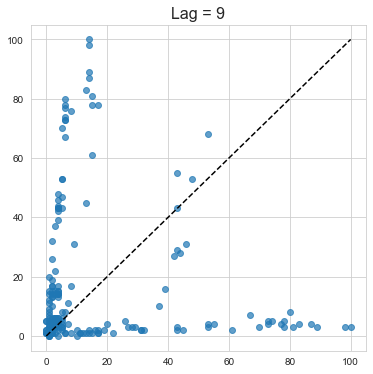

-0.034953891363475056


<Figure size 432x288 with 0 Axes>

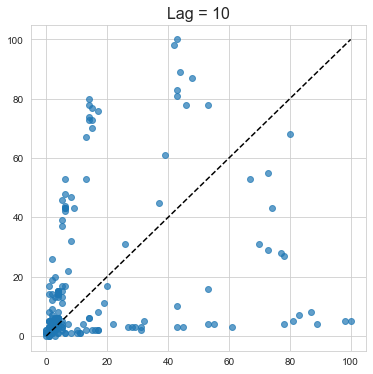

0.3291124847812648


<Figure size 432x288 with 0 Axes>

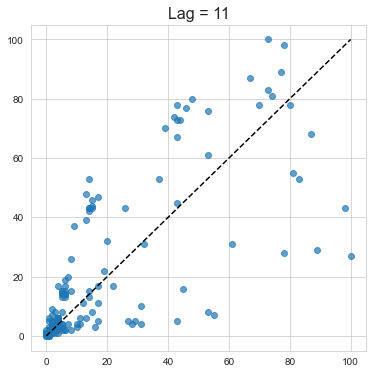

0.7757174373308512


<Figure size 432x288 with 0 Axes>

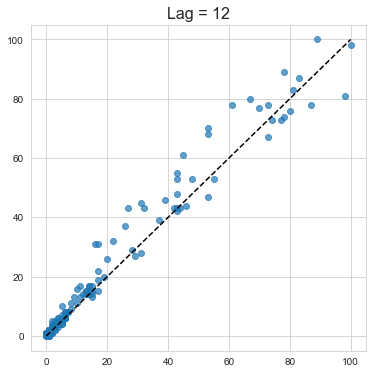

0.984928424569711


<Figure size 432x288 with 0 Axes>

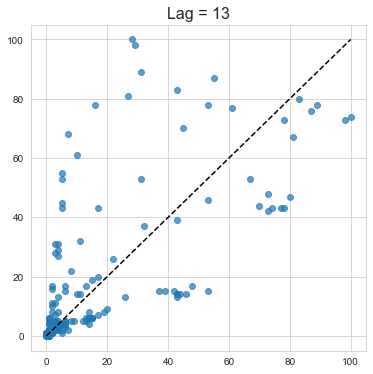

0.7161972553032341


<Figure size 432x288 with 0 Axes>

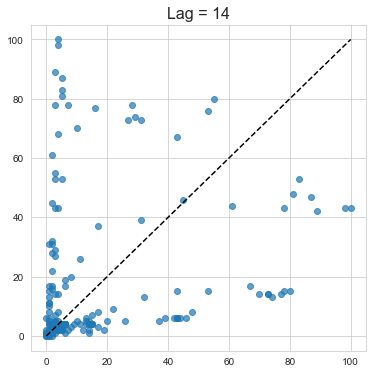

0.27629777295618757


<Figure size 432x288 with 0 Axes>

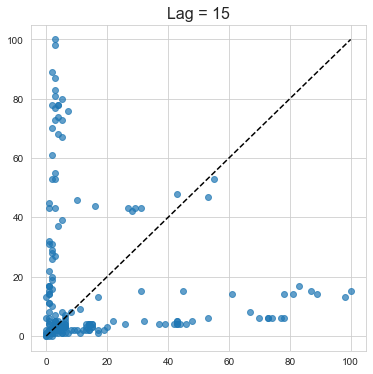

-0.06360197904943918


<Figure size 432x288 with 0 Axes>

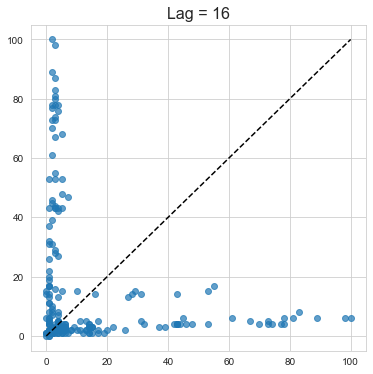

-0.22039490621656832


<Figure size 432x288 with 0 Axes>

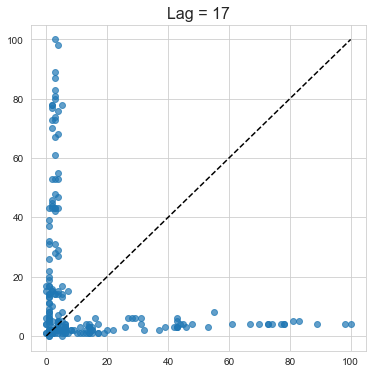

-0.25872603695118845


<Figure size 432x288 with 0 Axes>

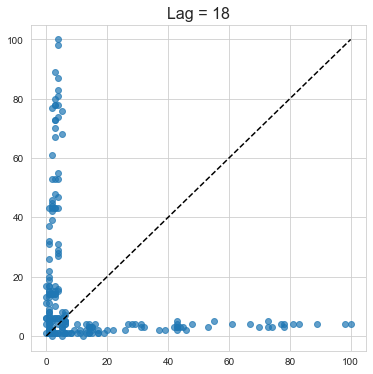

-0.2647999690111038


<Figure size 432x288 with 0 Axes>

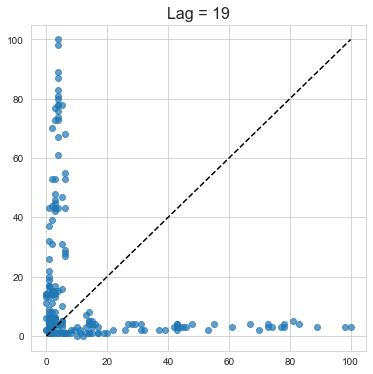

-0.2581700646959722


<Figure size 432x288 with 0 Axes>

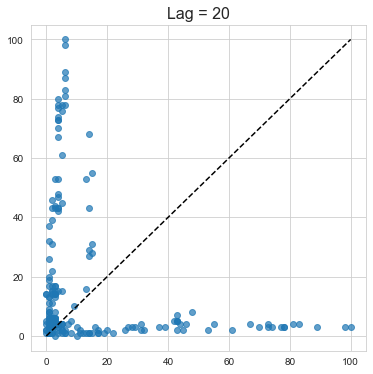

-0.2109824414553438


<Figure size 432x288 with 0 Axes>

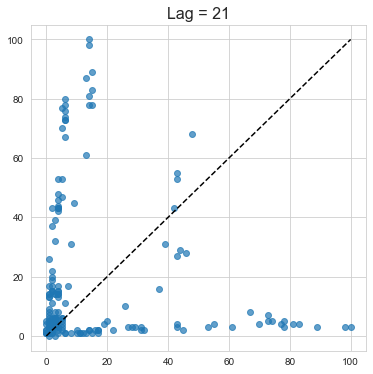

-0.03381781342414789


<Figure size 432x288 with 0 Axes>

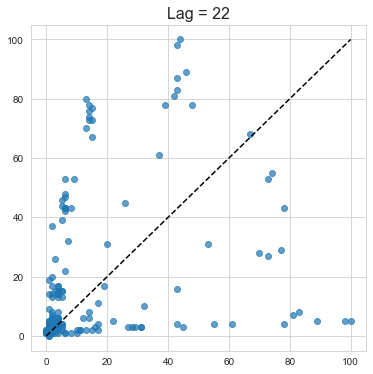

0.3372456805504497


<Figure size 432x288 with 0 Axes>

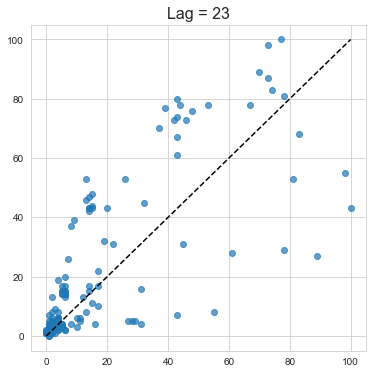

0.7862589894726716


<Figure size 432x288 with 0 Axes>

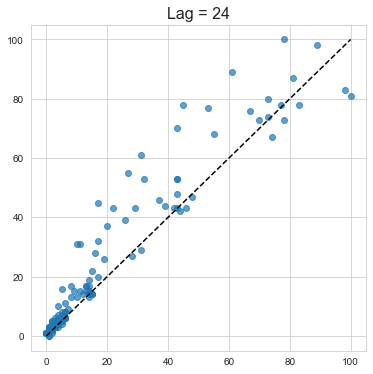

0.9598169691626818


In [60]:
for i in np.arange(1,25):
    plt.figure()
    coef = make_lag_plot(i)
    print(coef)

In [ ]:
.corr()

##### f.

Select a baseline forecast for these data.

Plot the baseline forecast along with the training data.

Recall that for seasonal data we considered the following baselines in lecture:
- The seasonal average and
- The seasonal naive.

In [64]:
## These functions may be useful

## extracts the year from a datetime
def get_year(date):
    return date.year

## extracts the month from a datetime
def get_month(date):
    return date.month

In [65]:
avg = np.zeros(12)

for i in np.arange(1,12):
    avg[i] = pump_train[pump_train['Month'].apply(get_month) == i].interest_level.mean()

array([ 0.        ,  4.33333333,  3.11111111,  2.38888889,  2.22222222,
        2.        ,  2.        ,  3.        , 21.        , 49.22222222,
       49.11111111, 33.72222222])

In [68]:
pump_test['Month']

216   2022-01-01
217   2022-02-01
218   2022-03-01
219   2022-04-01
220   2022-05-01
221   2022-06-01
222   2022-07-01
223   2022-08-01
224   2022-09-01
Name: Month, dtype: datetime64[ns]

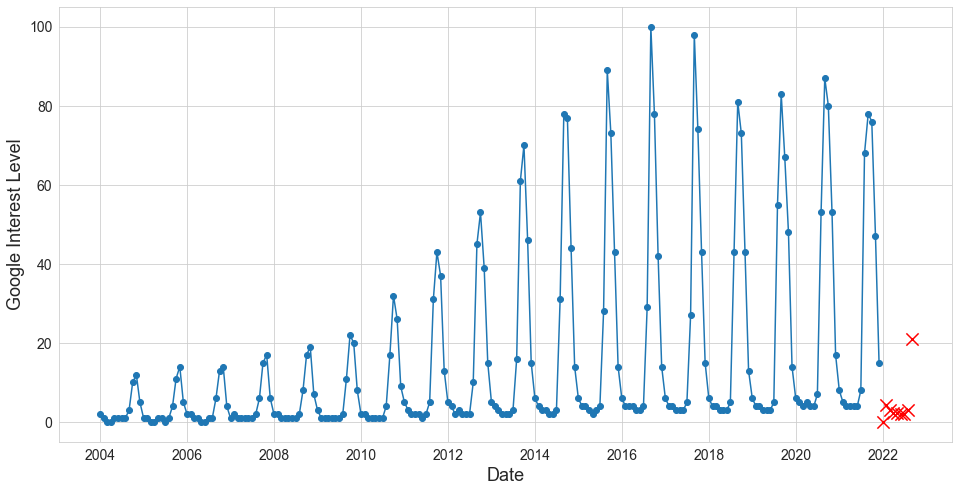

In [69]:
plt.figure(figsize=(16,8))

## plot your training data here
plt.plot(pump_train['Month'],pump_train.interest_level,
            '-o',
            label='Training Data')

## plot your forecast here
plt.scatter(pump_test['Month'],avg[:9],
               color='red',
               marker='x',
               s=150,
               label='Forecast')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Date", fontsize=18)
plt.ylabel("Google Interest Level", fontsize=18)

plt.show()

##### g.

Get the average cross-validation RMSE for your baseline model. Do 5-fold cross-validation with a test set size of 12.

In [70]:
kfold = TimeSeriesSplit(n_splits = 5,
                           test_size = 12)

In [73]:
# make a holder for the rmses
rmses = np.zeros(5)

i = 0
## loop through your splits here
for train_index,test_index in kfold.split(pump_train):
    pump_tt = pump_train.loc[train_index]
    pump_ho = pump_train.loc[test_index]
    
    for j in np.arange(1,12):
        avg[j] = pump_tt[pump_tt['Month'].apply(get_month) == j].interest_level.mean()
    
    ## record the rmse here
    rmses[i] = np.sqrt(mean_squared_error(pump_ho.interest_level,avg))
    
    
    i = i + 1

In [74]:
np.mean(rmses)

27.32514694174572

##### h.

Doesn't it seem like pumpkin spice shows up earlier each year? Use the training set to investigate this question. For each year in the training set find the month where the peak search interest occurs, does what you find support the implicit hypothesis of the question.

<i>Hint: the functions `get_year` and `get_month` could be useful here.</i>

In [75]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

In [ ]:
pump_train[pump_train['Month'].apply(get_year) == i].argmax()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)